In [5]:
import pandas as pd
df=pd.read_csv("/content/archive (2).zip")
print("sample rows")
print(df.head())
print("dataset shape")
print(f'Rows:{df.shape[0]},Columns:{df.shape[1]}')
print("Dataset info")
print(df.info())
print("Summary statistics")
print(df.describe(include='all'))
print("Missing values")
print(df.isnull().sum())


sample rows
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
dataset shape
Rows:200,Columns:5
Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
Summary statistics
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std

In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
print("sample rows")
print(df.head())
print("dataset shape")
print(f'Rows:{df.shape[0]},Columns:{df.shape[1]}')
print("Dataset info")
print(df.info())
print("Summary statistics")
print(df.describe(include='all'))
print("Missing values")
print(df.isnull().sum())

sample rows
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
dataset shape
Rows:200,Columns:4
Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
Summary statistics
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%   

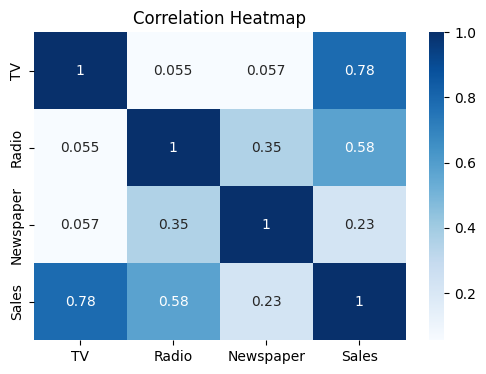

In [9]:
#EDA
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


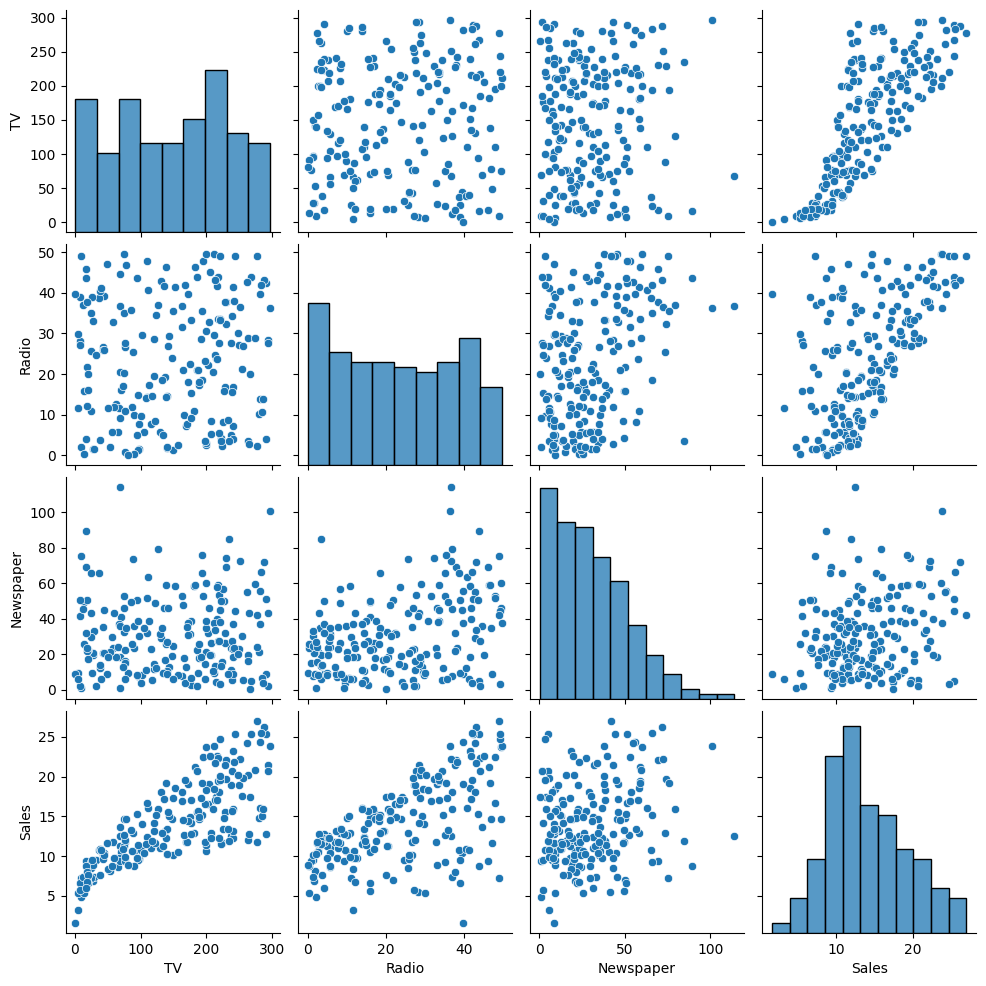

In [10]:
sns.pairplot(df)
plt.show()


In [12]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [20]:
#evaluation
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
root_mean_squared_error = root_mean_squared_error(y_test, y_pred)
print(f'root mean squared error:',root_mean_squared_error)

R2 Score: 0.899438024100912
Mean Squared Error: 3.1740973539761033
root mean sqaured error: 1.78159966153345


In [22]:
comparison = pd.DataFrame({
    "Actual Sales": y_test.values,
    "Predicted Sales": y_pred
})
comparison.head()


,Actual Sales,Predicted Sales
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373


In [23]:
coef_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coef_df


,Coefficient
TV,0.044730
Radio,0.189195
Newspaper,0.002761


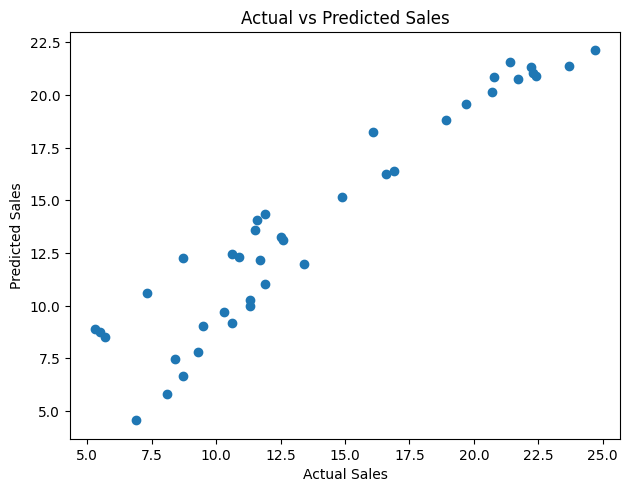

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.tight_layout()
plt.title("Actual vs Predicted Sales")
plt.show()
